# Introduction
This notebook converts the support ticket datasets provided in this AWS Machine Learning [Blog Post](https://aws.amazon.com/blogs/machine-learning/how-service-providers-can-use-natural-language-processing-to-gain-insights-from-customer-tickets-with-amazon-comprehend/) into a format that can be used by Comprehend for custom classification.

## Install, Import relevant python libraries

In [2]:
!pip install wordcloud


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import boto3
import sagemaker
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Process the training data
In this notebook, we are going to work with 2 training datasets stored in the data/ folder. Each file is desscribed as followed:

* training_data_operations.csv – This file is a two-column CSV file that we use to train the Operation classification model. The first column contains class, and the second column contains document.
* training_data_resources.csv – This file is a two-column CSV file that we use to train the Resource classification model. Like the training_data_operations.csv file, the first column contains class, and the second column contains document.

## training_data_operations.csv

In [4]:
# Read the training_data_operations.csv as a pandas Dataframe
operations_df = pd.read_csv("data/training_data_operations.csv", header=None, names = [ "label", "text"])
operations_df.head()

,label,text
0,Update,Change timezone on server\n Please change the ...
1,Update,UpdateTimeZone\n Change to AEST time zone as r...
2,Update,Update temporary user on i-183865cdfgawerk3 (M...
3,Update,EC2 name change\n Hi Team\n\nRequesting to cha...
4,Update,Update the cron task on ec2 instance\n Update ...


In [5]:
%matplotlib inline

# Plot a bar chart to see see the distribution of each operation (label)

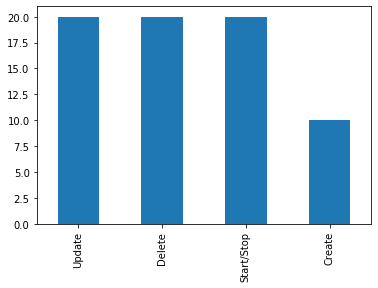

In [18]:
operations_df['label'].value_counts().plot(kind='bar')

# Wordcloud for the operations dataset

(-0.5, 399.5, 199.5, -0.5)

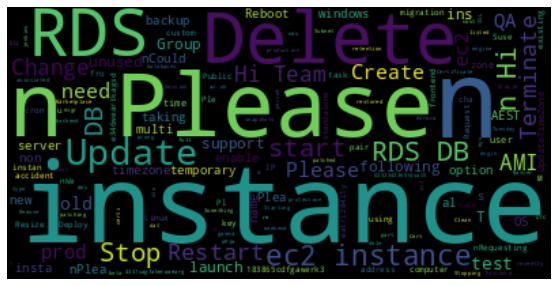

In [19]:
wordcloud = WordCloud().generate(operations_df['text'].to_string())
fig, ax = plt.subplots(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## training_data_resources.csv

In [20]:
resources_df = pd.read_csv("data/training_data_resources.csv", header=None, names=["label", "text"])

In [21]:
resources_df.head()

,label,text
0,EC2,Change timezone on server\n Please change the ...
1,EC2,UpdateTimeZone\n Change to AEST time zone as r...
2,EC2,Update temporary user on i-183865cdfgawerk3 (M...
3,EC2,EC2 name change\n Hi Team\n\nRequesting to cha...
4,EC2,Update the cron task on ec2 instance\n Update ...


# Plot a bar chart to see see the distribution of each resource type (label)

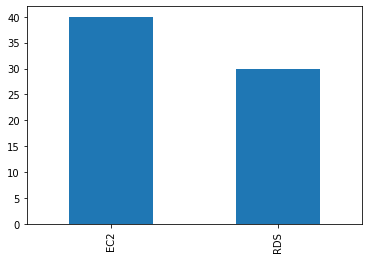

In [23]:
resources_df['label'].value_counts().plot(kind='bar')

In [24]:
# Wordcloud for the resources dataset

(-0.5, 399.5, 199.5, -0.5)

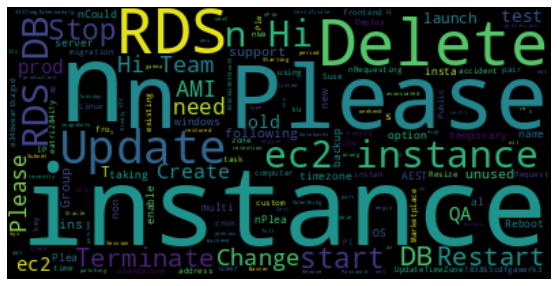

In [25]:
wordcloud = WordCloud().generate(resources_df['text'].to_string())
fig, ax = plt.subplots(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Upload training data to S3 Bucket

In [13]:
# Upload training_data_operations.csv and training_data_resources.csv to the new S3 bucket using boto3 library

s3_client = boto3.client("s3")
sm_session = sagemaker.Session()
bucket = sm_session.default_bucket()
data_prefix = "ticket_classifier"

In [14]:
operations_df_filename = os.path.join("s3://", bucket, data_prefix, "training_data_operations.csv")
resources_df_filename = os.path.join("s3://", bucket, data_prefix, "training_data_resources.csv")

In [15]:
operations_df.to_csv(operations_df_filename, header=None, index=False)
resources_df.to_csv(resources_df_filename, header=None, index=False)

In [16]:
print(operations_df_filename)
print(resources_df_filename)

s3://sagemaker-us-east-2-869530972998/ticket_classifier/training_data_operations.csv
s3://sagemaker-us-east-2-869530972998/ticket_classifier/training_data_resources.csv
